# KLASIFIKASI GAMBAR BURUNG

#### Kelompok 2 B2 2020 
<li> dataset : 

In [2]:
import os 
import shutil 
import re
import random 
import tensorflow 
import keras  
import glob 
from skimage import io
import numpy as np
import matplotlib.pyplot as plt  
%matplotlib inline

import tensorflow as tf
import matplotlib.pyplot as plt
from keras_preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

## Preprocessing Data

In [5]:
root_path = r'D:\KB\PA_KB\KB_2_B2-master\dataset'
source_path = os.path.join(root_path,'data gambar') #tempat dataset disimpan
destination_path = os.path.join(root_path, 'data gambar fix')
class_aves =['Order Anseriformes','Order Apodiformes', 'Order Apterygiformes']

In [6]:
#melihat banyak data gambar dlm folder
folders = {}

for folder in os.listdir(source_path):
    folders[folder] = len(os.listdir(os.path.join(source_path,  folder)))

folders

{'Order Anseriformes': 40,
 'Order Apodiformes': 40,
 'Order Apterygiformes': 40,
 'Order Caprimulgiformes': 40,
 'Order Casuariiformes': 40,
 'Order Charadriiformes': 40,
 'Order Ciconiiformes': 40,
 'Order Coliiformes': 40,
 'Order Columbiformes': 40,
 'Order Coraciiformes': 40,
 'Order Cuculiformes': 40,
 'Order Falconiformes': 40,
 'Order Galliformes': 40,
 'Order Gaviiformes': 40,
 'Order Gruiformes': 40,
 'Order Passeriformes': 40,
 'Order Pelecaniformes': 39,
 'Order Phoenicopteriformes': 40,
 'Order Piciformes': 40,
 'Order Podicipediformes': 40,
 'Order Procellariiformes': 40,
 'Order Psittaciformes': 40,
 'Order Pteroclidiformes': 40,
 'Order Rheiformes': 40,
 'Order Sphenisciformes': 40,
 'Order Strigiformes': 40,
 'Order Struthioniformes': 40,
 'Order Tinamiformes': 40,
 'Order Trogoniformes': 40,
 'Order Turniciformes': 40}

In [7]:
if os.path.isdir(os.path.join(destination_path, 'data_training')):
    print(f"path {os.path.join(destination_path, 'data_training')} sudah ada")
else:
    os.makedirs(os.path.join(destination_path, 'data_training'))
    for folder in folders.keys():
        os.makedirs(os.path.join(destination_path, f'data_training/{folder}'))

if os.path.isdir(os.path.join(destination_path, 'data_testing')):
    print(f"path {os.path.join(destination_path, 'data_testing')} sudah ada")
else:
    os.makedirs(os.path.join(destination_path, 'data_testing'))
    for folder in folders.keys():
        os.makedirs(os.path.join(destination_path, f'data_testing/{folder}'))

path D:\KB\PA_KB\KB_2_B2-master\dataset\data gambar fix\data_training sudah ada
path D:\KB\PA_KB\KB_2_B2-master\dataset\data gambar fix\data_testing sudah ada


In [8]:
aves_path = os.path.join(source_path,class_aves[1],'*')
aves_path = glob.glob(aves_path)

In [9]:
# #Menampilkan gambar dari dataset
# image = io.imread(aves_path[2])  

# #memplot gambar original
# i, (im1) = plt.subplots(1)
# i.set_figwidth(15)
# im1.imshow(image)

In [10]:
files_name = {
     'Order Anseriformes': [],
     'Order Apodiformes': [],
     'Order Apterygiformes': [],
     'Order Caprimulgiformes': [],
     'Order Casuariiformes': [],
     'Order Charadriiformes': [],
     'Order Ciconiiformes': [],
     'Order Coliiformes': [],
     'Order Columbiformes': [],
     'Order Coraciiformes': [],
     'Order Cuculiformes': [],
     'Order Falconiformes': [],
     'Order Galliformes': [],
     'Order Gaviiformes': [],
     'Order Gruiformes': [],
     'Order Passeriformes': [],
     'Order Pelecaniformes': [],
     'Order Phoenicopteriformes': [],
     'Order Piciformes': [],
     'Order Podicipediformes': [],
     'Order Procellariiformes': [],
     'Order Psittaciformes': [],
     'Order Pteroclidiformes': [],
     'Order Rheiformes': [],
     'Order Sphenisciformes': [],
     'Order Strigiformes': [],
     'Order Struthioniformes': [],
     'Order Tinamiformes': [],
     'Order Trogoniformes': [],
     'Order Turniciformes': [],
}

files_train = {
        'Order Anseriformes': [],
     'Order Apodiformes': [],
     'Order Apterygiformes': [],
     'Order Caprimulgiformes': [],
     'Order Casuariiformes': [],
     'Order Charadriiformes': [],
     'Order Ciconiiformes': [],
     'Order Coliiformes': [],
     'Order Columbiformes': [],
     'Order Coraciiformes': [],
     'Order Cuculiformes': [],
     'Order Falconiformes': [],
     'Order Galliformes': [],
     'Order Gaviiformes': [],
     'Order Gruiformes': [],
     'Order Passeriformes': [],
     'Order Pelecaniformes': [],
     'Order Phoenicopteriformes': [],
     'Order Piciformes': [],
     'Order Podicipediformes': [],
     'Order Procellariiformes': [],
     'Order Psittaciformes': [],
     'Order Pteroclidiformes': [],
     'Order Rheiformes': [],
     'Order Sphenisciformes': [],
     'Order Strigiformes': [],
     'Order Struthioniformes': [],
     'Order Tinamiformes': [],
     'Order Trogoniformes': [],
     'Order Turniciformes': [],
}

files_test = {
     'Order Anseriformes': [],
     'Order Apodiformes': [],
     'Order Apterygiformes': [],
     'Order Caprimulgiformes': [],
     'Order Casuariiformes': [],
     'Order Charadriiformes': [],
     'Order Ciconiiformes': [],
     'Order Coliiformes': [],
     'Order Columbiformes': [],
     'Order Coraciiformes': [],
     'Order Cuculiformes': [],
     'Order Falconiformes': [],
     'Order Galliformes': [],
     'Order Gaviiformes': [],
     'Order Gruiformes': [],
     'Order Passeriformes': [],
     'Order Pelecaniformes': [],
     'Order Phoenicopteriformes': [],
     'Order Piciformes': [],
     'Order Podicipediformes': [],
     'Order Procellariiformes': [],
     'Order Psittaciformes': [],
     'Order Pteroclidiformes': [],
     'Order Rheiformes': [],
     'Order Sphenisciformes': [],
     'Order Strigiformes': [],
     'Order Struthioniformes': [],
     'Order Tinamiformes': [],
     'Order Trogoniformes': [],
     'Order Turniciformes': [],
}

In [11]:
for type in files_name.keys():
    for file in os.listdir(os.path.join(source_path, type)):
        if os.path.getsize(os.path.join(source_path, f'{type}/{file}')):
            files_name[type].append(file)
        else:
            print(f'{file} dilewatkan')

In [12]:
#test melihat panjang sebuah folder 
len(files_name['Order Turniciformes'])

40

In [13]:
split_point = {
     'Order Anseriformes': 0,
     'Order Apodiformes': 0,
     'Order Apterygiformes': 0,
     'Order Caprimulgiformes': 0,
     'Order Casuariiformes': 0,
     'Order Charadriiformes': 0,
     'Order Ciconiiformes': 0,
     'Order Coliiformes': 0,
     'Order Columbiformes': 0,
     'Order Coraciiformes': 0,
     'Order Cuculiformes': 0,
     'Order Falconiformes': 0,
     'Order Galliformes': 0,
     'Order Gaviiformes': 0,
     'Order Gruiformes': 0,
     'Order Passeriformes': 0,
     'Order Pelecaniformes': 0,
     'Order Phoenicopteriformes': 0,
     'Order Piciformes': 0,
     'Order Podicipediformes': 0,
     'Order Procellariiformes': 0,
     'Order Psittaciformes': 0,
     'Order Pteroclidiformes': 0,
     'Order Rheiformes': 0,
     'Order Sphenisciformes': 0,
     'Order Strigiformes': 0,
     'Order Struthioniformes': 0,
     'Order Tinamiformes': 0,
     'Order Trogoniformes': 0,
     'Order Turniciformes': 0,
}

for key in split_point.keys():
    split_point[key] = int(len(files_name[key])*.8)

for key in files_train.keys():
    files_train[key].append(files_name[key][:split_point[key]])
    files_test[key].append(files_name[key][split_point[key]:])


In [14]:
len(files_train['Order Anseriformes'][0])

32

In [15]:
len(files_test['Order Anseriformes'][0])

8

In [16]:
source_path

'D:\\KB\\PA_KB\\KB_2_B2-master\\dataset\\data gambar'

In [17]:
destination_path

'D:\\KB\\PA_KB\\KB_2_B2-master\\dataset\\data gambar fix'

In [18]:
for type in files_name.keys():
    for file in files_train[type][0]:
        shutil.copyfile(
            os.path.join(source_path, f'{type}/{file}'),
            os.path.join(destination_path, f'data_training/{type}/{file}')
        )
    for file in files_test[type][0]:
        shutil.copyfile(
            os.path.join(source_path, f'{type}/{file}'),
            os.path.join(destination_path, f'data_testing/{type}/{file}')
        )

## Training & Modeling Data

In [52]:
# melakukan training dan validasi data generator dengan ImageDataGenerator

train_generator = ImageDataGenerator(rescale=1/255,
                               horizontal_flip=True,
                               vertical_flip=True,
                               rotation_range=60,
                               zoom_range=0.5,
                               fill_mode='nearest')

val_generator = ImageDataGenerator(rescale=1/255,
                               horizontal_flip=True,
                               vertical_flip=True,
                               rotation_range=60,
                               zoom_range=0.5,
                               fill_mode='nearest')

In [65]:
# melakukan training data generator dengan folder training dan validasi data dengan folder testing

train_data = train_generator.flow_from_directory('D:\KB\PA_KB\KB_2_B2-master\dataset\data gambar fix\data_training',
                                             target_size=(150, 150),
                                             batch_size=30,
                                             class_mode='categorical')

val_data = val_generator.flow_from_directory('D:\KB\PA_KB\KB_2_B2-master\dataset\data gambar fix\data_testing',
                                             target_size=(150, 150),
                                             batch_size=30,
                                             class_mode='categorical')

Found 959 images belonging to 30 classes.
Found 240 images belonging to 30 classes.


In [75]:
# melakukan modeling data pada data testing dan training

model_data = tf.keras.Sequential([
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(30, activation='softmax')
])

In [76]:
model_data.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 148, 148, 128)     3584      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 74, 74, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 72, 72, 64)        73792     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 34, 34, 32)        18464     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 17, 17, 32)      

In [77]:
model_data.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4),
                   loss='categorical_crossentropy', 
                   metrics=['accuracy'])
#                   run_eagerly=True)

In [78]:
# melakukan training model

history = model_data.fit(train_data,                    
                    epochs=10,
                    validation_data=val_data,                    
                    verbose=2)

Epoch 1/10
32/32 - 96s - loss: 3.4028 - accuracy: 0.0396 - val_loss: 3.3878 - val_accuracy: 0.0417 - 96s/epoch - 3s/step
Epoch 2/10
32/32 - 89s - loss: 3.3524 - accuracy: 0.0615 - val_loss: 3.3720 - val_accuracy: 0.0500 - 89s/epoch - 3s/step
Epoch 3/10
32/32 - 90s - loss: 3.3119 - accuracy: 0.0678 - val_loss: 3.3567 - val_accuracy: 0.0417 - 90s/epoch - 3s/step
Epoch 4/10
32/32 - 97s - loss: 3.2863 - accuracy: 0.0688 - val_loss: 3.3377 - val_accuracy: 0.0708 - 97s/epoch - 3s/step
Epoch 5/10
32/32 - 63s - loss: 3.2515 - accuracy: 0.0803 - val_loss: 3.3319 - val_accuracy: 0.0708 - 63s/epoch - 2s/step
Epoch 6/10
32/32 - 80s - loss: 3.2401 - accuracy: 0.0834 - val_loss: 3.3143 - val_accuracy: 0.0625 - 80s/epoch - 3s/step
Epoch 7/10
32/32 - 152s - loss: 3.1984 - accuracy: 0.0897 - val_loss: 3.3182 - val_accuracy: 0.0667 - 152s/epoch - 5s/step
Epoch 8/10
32/32 - 136s - loss: 3.1847 - accuracy: 0.0938 - val_loss: 3.2788 - val_accuracy: 0.0875 - 136s/epoch - 4s/step
Epoch 9/10
32/32 - 135s - lo

In [81]:
y_train = history.history['accuracy']
y_val = history.history['val_accuracy']

train_y = history.history['loss']
val_y = history.history['val_loss']
x = range(len(y_train))

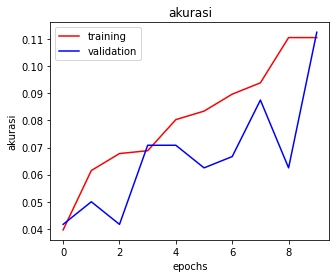

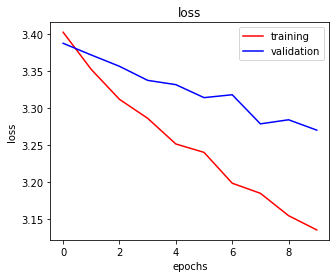

In [82]:
# plot perubahan nilai loss dan akurasi

plt.figure(1, figsize=(5,4))
plt.plot(x, y_train, c='r', label='training')
plt.plot(x, y_val, c='b', label='validation')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('akurasi')
plt.title('akurasi')

plt.figure(2, figsize=(5,4))
plt.plot(x, train_y, c='r', label='training')
plt.plot(x, val_y, c='b', label='validation')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('loss')

plt.show()